In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import scipy 
from scipy.stats import skew, norm

In [2]:
df=pd.read_csv('turkiye-student-evaluation_generic.csv')

In [3]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [5]:
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [7]:
for i in df.columns:
    if i=='Q1':
        break
    else:
        print(i)
        print(df[i].value_counts())
        print()

instr
3    3601
2    1444
1     775
Name: instr, dtype: int64

class
3     904
13    841
5     656
9     571
6     558
8     500
11    484
10    448
1     303
4     187
7     187
2     140
12     41
Name: class, dtype: int64

nb.repeat
1    4909
2     576
3     335
Name: nb.repeat, dtype: int64

attendance
0    1902
3    1252
1    1028
4     846
2     792
Name: attendance, dtype: int64

difficulty
3    1774
1    1620
4    1225
5     652
2     549
Name: difficulty, dtype: int64



In [8]:
x_questions = df.iloc[:, 5:33]
q_mean = x_questions.mean(axis=0)
total_mean = q_mean.mean()

In [9]:
mean_df=q_mean.to_frame('mean')

In [10]:
mean_df.head()

,mean
Q1,2.929897
Q2,3.073883
Q3,3.178694
Q4,3.082474
Q5,3.105842


In [11]:
x=df.iloc[:,5:]

In [12]:
x

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,4,4,4,4,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [13]:
from sklearn.decomposition import PCA

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(x)

In [15]:
X_pca

array([[ 0.98901533,  0.52279815],
       [ 0.98901533,  0.52279815],
       [-9.59128851,  0.6408021 ],
       ...,
       [-9.59128851,  0.6408021 ],
       [11.56931918,  0.40479421],
       [11.56931918,  0.40479421]])

In [16]:
pca.explained_variance_ratio_.cumsum()[1]

0.8671381678891091

In [17]:
from sklearn.cluster import KMeans
distortions = []
cluster_range = range(1,6)

# elbow method
for i in cluster_range:
    model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    model.fit(X_pca)
    distortions.append(model.inertia_)

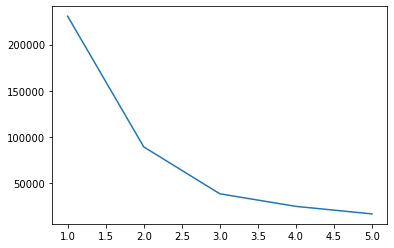

In [18]:
plt.plot(cluster_range,distortions)

In [19]:
model = KMeans(n_clusters=3, init='k-means++', random_state=42)
model.fit(X_pca)
y = model.predict(X_pca)
y

array([2, 2, 1, ..., 1, 0, 0])

In [34]:
X_pca

array([[ 0.98901533,  0.52279815],
       [ 0.98901533,  0.52279815],
       [-9.59128851,  0.6408021 ],
       ...,
       [-9.59128851,  0.6408021 ],
       [11.56931918,  0.40479421],
       [11.56931918,  0.40479421]])

In [32]:
y

array([2, 2, 1, ..., 1, 0, 0])

In [30]:
X_pca[y==0,0]

array([11.56931918, 11.56931918,  9.46382121, ..., 11.56931918,
       11.56931918, 11.56931918])

In [21]:
X_pca[y==0, 1]

array([ 0.40479421,  0.40479421, -1.58587307, ...,  0.40479421,
        0.40479421,  0.40479421])

In [22]:
df['label']=y

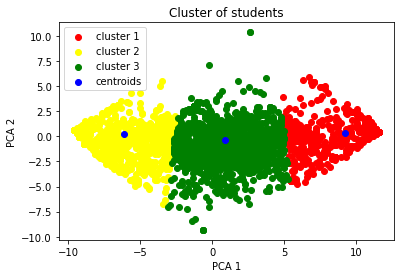

In [23]:
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], c='red', label='cluster 1')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], c='yellow', label='cluster 2')
plt.scatter(X_pca[y==2, 0], X_pca[y==2, 1], c='green', label='cluster 3')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], c='blue', label='centroids')
plt.title('Cluster of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [76]:
from collections import Counter
Counter(y)

Counter({2: 2358, 1: 2222, 0: 1240})

In [83]:
model = KMeans(n_clusters=3, init='k-means++', random_state=42)
model.fit(x)
y = model.predict(x)

In [84]:
Counter(y)

Counter({2: 2358, 1: 2222, 0: 1240})

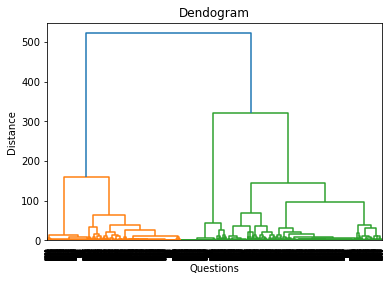

In [85]:
import scipy.cluster.hierarchy as hier
dendogram = hier.dendrogram(hier.linkage(X_pca, method='ward'))
plt.title('Dendogram')
plt.xlabel("Questions")
plt.ylabel("Distance")
plt.show()

In [86]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y = model.fit_predict(X_pca)

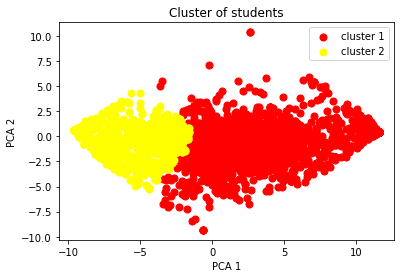

In [87]:
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], s=50, c='red', label='cluster 1')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], s=50, c='yellow', label='cluster 2')
plt.title('Cluster of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()